----
# Eigenvalue plot for LDA dimensionality reduction

----

In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix
"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [2]:

# Load data sets


train_data = pd.read_csv("../TrainingData/neodata/soltani_14d_nonoise_1200.csv")
test_data = pd.read_csv("../TestData/neodata/soltani_14d_nonoise_100.csv")
vald_data=pd.read_csv("../ValidationData/neodata/soltani_14d_nonoise_1200.csv")



## Standardize data (z-norm)

In [3]:
#standardization
import standardization as sd
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)        #The function makes sure the target is not a part of the transformation
vald = standardizer.transform(vald_data)
tst = standardizer.transform(test_data)





## LDA dimensionality reduction

Preserving 99.28% of variance


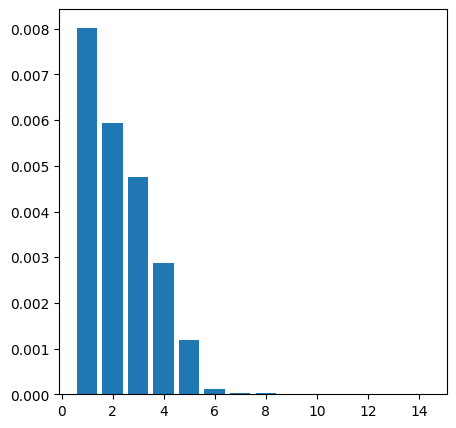

In [4]:
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')



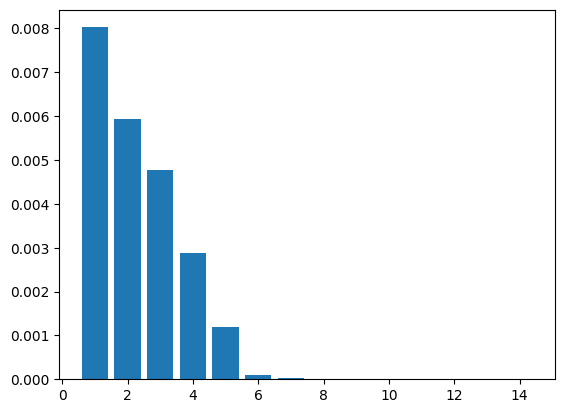

In [5]:
#Saves the eigenvalue plot
plt.bar([x for x in range(1,14+1)],np.real(lda.eig_val[0:14]))
plt.savefig("LDA_14d_eigvalue.pdf", format="pdf", bbox_inches="tight")